In [1]:
from datetime import datetime, timedelta 
import time
import requests
import pandas as pd
import lxml
from lxml import html

In [2]:
def format_date(date_datetime):
     date_timetuple = date_datetime.timetuple()
     date_mktime = time.mktime(date_timetuple)
     date_int = int(date_mktime)
     date_str = str(date_int)
     return date_str
    

In [3]:
def subdomain(symbol, start, end, filter='history'):
     subdoma="/quote/{0}/history?period1={1}&period2={2}&interval=1d&filter={3}&frequency=1d"
     subdomain = subdoma.format(symbol, start, end, filter)
     return subdomain
 

In [4]:
def header_function(subdomain):
     hdrs =  {"authority": "finance.yahoo.com",
              "method": "GET",
              "path": subdomain,
              "scheme": "https",
              "accept": "text/html",
              "accept-encoding": "gzip, deflate, br",
              "accept-language": "en-US,en;q=0.9",
              "cache-control": "no-cache",
              "dnt": "1",
              "pragma": "no-cache",
              "sec-fetch-mode": "navigate",
              "sec-fetch-site": "same-origin",
              "sec-fetch-user": "?1",
              "upgrade-insecure-requests": "1",
              "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64)"}
     
     return hdrs
    

In [5]:
def scrape_page(url, header):
     page = requests.get(url, headers=header)
     element_html = html.fromstring(page.content)
     table = element_html.xpath('//table')
     table_tree = lxml.etree.tostring(table[0], method='xml')
     panda = pd.read_html(table_tree)
     return panda

In [6]:
if __name__ == '__main__':
     symbol = 'BTC-USD'
     
     dt_start = datetime.today() - timedelta(days=365)
     dt_end = datetime.today()
    
     start = format_date(dt_start)
     end = format_date(dt_end)
     
     sub = subdomain(symbol, start, end)
     header = header_function(sub)
     
     base_url = 'https://finance.yahoo.com'
     url = base_url + sub
     price_history = scrape_page(url, header)

In [7]:
df = price_history[0]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         101 non-null    object
 1   Open         101 non-null    object
 2   High         101 non-null    object
 3   Low          101 non-null    object
 4   Close*       101 non-null    object
 5   Adj Close**  101 non-null    object
 6   Volume       101 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB


In [9]:
df_filtered = df[df['Date']!= "*Close price adjusted for splits.**Adjusted close price adjusted for both dividends and splits."]

In [10]:
df_filtered['Date']=pd.to_datetime(df_filtered['Date'])

<ipython-input-10-dd3ba4d90744>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date']=pd.to_datetime(df_filtered['Date'])


In [11]:
num_cols=df_filtered.columns.drop('Date')

In [12]:
df_filtered[num_cols] = df_filtered[num_cols].apply(pd.to_numeric, errors='coerce')

c:\users\w4k3k\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [13]:
df_filtered

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2021-02-04,37773.65,38548.93,36356.54,37532.60,37532.60,68067311616
1,2021-02-03,35510.82,37480.19,35443.98,37472.09,37472.09,61166818159
2,2021-02-02,33533.20,35896.88,33489.22,35510.29,35510.29,63088585433
3,2021-02-01,33114.58,34638.21,32384.23,33537.18,33537.18,61400400660
4,2021-01-31,34270.88,34288.33,32270.18,33114.36,33114.36,52754542671
...,...,...,...,...,...,...,...
95,2020-11-01,13781.00,13862.03,13628.38,13737.11,13737.11,24453857900
96,2020-10-31,13546.53,14028.21,13457.53,13781.00,13781.00,30306464719
97,2020-10-30,13437.87,13651.52,13136.20,13546.52,13546.52,30581485201
98,2020-10-29,13271.30,13612.05,12980.06,13437.88,13437.88,56499499598


In [14]:
import matplotlib.pyplot as plt
from matplotlib import style

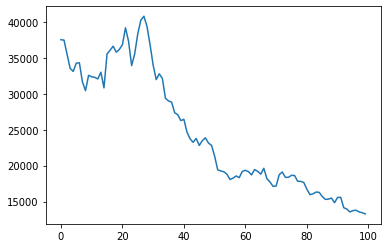

In [15]:
df_filtered['Adj Close**'].plot()
plt.show()

In [16]:
df_filtered =df_filtered.set_index('Date')

In [17]:
df_filtered

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2021-02-04,37773.65,38548.93,36356.54,37532.60,37532.60,68067311616
2021-02-03,35510.82,37480.19,35443.98,37472.09,37472.09,61166818159
2021-02-02,33533.20,35896.88,33489.22,35510.29,35510.29,63088585433
2021-02-01,33114.58,34638.21,32384.23,33537.18,33537.18,61400400660
2021-01-31,34270.88,34288.33,32270.18,33114.36,33114.36,52754542671
...,...,...,...,...,...,...
2020-11-01,13781.00,13862.03,13628.38,13737.11,13737.11,24453857900
2020-10-31,13546.53,14028.21,13457.53,13781.00,13781.00,30306464719
2020-10-30,13437.87,13651.52,13136.20,13546.52,13546.52,30581485201


In [18]:
df_filtered

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2021-02-04,37773.65,38548.93,36356.54,37532.60,37532.60,68067311616
2021-02-03,35510.82,37480.19,35443.98,37472.09,37472.09,61166818159
2021-02-02,33533.20,35896.88,33489.22,35510.29,35510.29,63088585433
2021-02-01,33114.58,34638.21,32384.23,33537.18,33537.18,61400400660
2021-01-31,34270.88,34288.33,32270.18,33114.36,33114.36,52754542671
...,...,...,...,...,...,...
2020-11-01,13781.00,13862.03,13628.38,13737.11,13737.11,24453857900
2020-10-31,13546.53,14028.21,13457.53,13781.00,13781.00,30306464719
2020-10-30,13437.87,13651.52,13136.20,13546.52,13546.52,30581485201


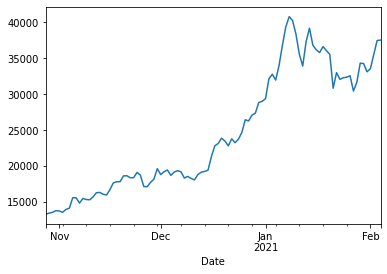

In [19]:
df_filtered['Adj Close**'].plot()
plt.show()